In [49]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import scale, StandardScaler
from sklearn.datasets import load_boston
from sklearn.linear_model import Perceptron, Ridge
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, \
    precision_recall_curve,confusion_matrix, r2_score, log_loss

from sklearn.svm import SVC
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from scipy.sparse import hstack
from sklearn.decomposition import PCA
from scipy.stats.stats import pearsonr
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, \
    GradientBoostingRegressor
from sklearn.cross_validation import train_test_split
from skimage.io import imread
from skimage import img_as_float
import pylab
from time import time

In [2]:
image = imread('parrots.jpg')

image

array([[[  4, 126,   5],
        [  2, 126,   2],
        [  2, 126,   2],
        ..., 
        [  0,  56,   2],
        [  0,  53,   8],
        [  2,  55,  11]],

       [[  4, 126,   5],
        [  2, 126,   2],
        [  2, 126,   2],
        ..., 
        [  0,  54,   1],
        [  0,  53,   8],
        [  0,  52,   8]],

       [[  3, 125,   4],
        [  2, 126,   2],
        [  2, 126,   2],
        ..., 
        [  0,  54,   1],
        [  0,  52,   8],
        [  0,  51,   8]],

       ..., 
       [[121,  96,   4],
        [114,  91,   0],
        [115,  94,   3],
        ..., 
        [  8,  21,  27],
        [ 12,  26,  37],
        [ 13,  28,  47]],

       [[116,  89,   0],
        [122,  97,   5],
        [113,  90,   0],
        ..., 
        [  6,  21,  26],
        [ 18,  36,  48],
        [ 10,  28,  48]],

       [[126,  97,   5],
        [131, 105,  12],
        [121,  96,   3],
        ..., 
        [  6,  23,  30],
        [ 21,  41,  52],
        [ 19,  42,

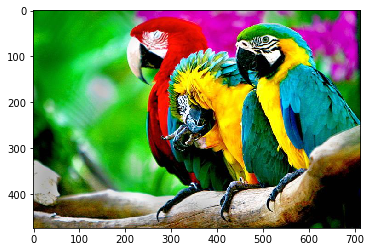

In [5]:
%matplotlib inline
pylab.imshow(image)

In [10]:
binimage = img_as_float(image)

binimage

array([[[ 0.01568627,  0.49411765,  0.01960784],
        [ 0.00784314,  0.49411765,  0.00784314],
        [ 0.00784314,  0.49411765,  0.00784314],
        ..., 
        [ 0.        ,  0.21960784,  0.00784314],
        [ 0.        ,  0.20784314,  0.03137255],
        [ 0.00784314,  0.21568627,  0.04313725]],

       [[ 0.01568627,  0.49411765,  0.01960784],
        [ 0.00784314,  0.49411765,  0.00784314],
        [ 0.00784314,  0.49411765,  0.00784314],
        ..., 
        [ 0.        ,  0.21176471,  0.00392157],
        [ 0.        ,  0.20784314,  0.03137255],
        [ 0.        ,  0.20392157,  0.03137255]],

       [[ 0.01176471,  0.49019608,  0.01568627],
        [ 0.00784314,  0.49411765,  0.00784314],
        [ 0.00784314,  0.49411765,  0.00784314],
        ..., 
        [ 0.        ,  0.21176471,  0.00392157],
        [ 0.        ,  0.20392157,  0.03137255],
        [ 0.        ,  0.2       ,  0.03137255]],

       ..., 
       [[ 0.4745098 ,  0.37647059,  0.01568627],
        

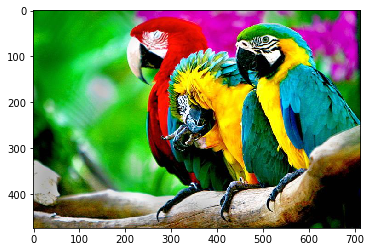

In [11]:
pylab.imshow(binimage)

In [12]:
len(binimage)*len(binimage[0])

337962

In [13]:
objects = np.zeros((len(binimage)*len(binimage[0]), 3), dtype=np.float64)

objects

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [14]:
pd.DataFrame(objects)

,0,1,2
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


In [15]:
k = 0

for i in range(len(binimage)):
    
    for j in range(len(binimage[i])):
        
        objects[k][0] = binimage[i][j][0]
        objects[k][1] = binimage[i][j][1]
        objects[k][2] = binimage[i][j][2]
        
        k = k+1
        
pd.DataFrame(objects, columns = ['r','g','b'])

,r,g,b
0,0.015686,0.494118,0.019608
1,0.007843,0.494118,0.007843
2,0.007843,0.494118,0.007843
3,0.007843,0.494118,0.007843
4,0.007843,0.501961,0.011765
5,0.011765,0.505882,0.011765
6,0.007843,0.513725,0.015686
7,0.003922,0.517647,0.007843
8,0.007843,0.521569,0.011765
9,0.000000,0.525490,0.003922


In [16]:
colors = 16

kmeans = KMeans(random_state=241, init='k-means++', n_clusters = colors).fit(objects)

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=241, tol=0.0001, verbose=0)

In [17]:
kmeans.cluster_centers_ 

array([[ 0.37165596,  0.20801051,  0.04114278],
       [ 0.89791097,  0.89752073,  0.88834029],
       [ 0.17982926,  0.76282867,  0.11753857],
       [ 0.02648658,  0.03523423,  0.01904194],
       [ 0.96900904,  0.84762963,  0.03898081],
       [ 0.04710517,  0.64327707,  0.71449075],
       [ 0.61309591,  0.54763685,  0.48955234],
       [ 0.78524229,  0.07236145,  0.69940565],
       [ 0.8330942 ,  0.06271549,  0.03025851],
       [ 0.03545123,  0.57736066,  0.02108121],
       [ 0.3576325 ,  0.81565964,  0.47091438],
       [ 0.67650051,  0.76041803,  0.71271256],
       [ 0.04317647,  0.42660796,  0.44082278],
       [ 0.04298229,  0.28980804,  0.09468983],
       [ 0.40039578,  0.41742174,  0.30525819],
       [ 0.64542047,  0.48992118,  0.09103577]])

In [18]:
kmeans.predict(objects)

array([ 9,  9,  9, ...,  3, 13, 13])

In [19]:
df = pd.DataFrame(objects, columns = ['r','g','b'])
df['clust'] = pd.Series(kmeans.predict(objects))

df

,r,g,b,clust
0,0.015686,0.494118,0.019608,9
1,0.007843,0.494118,0.007843,9
2,0.007843,0.494118,0.007843,9
3,0.007843,0.494118,0.007843,9
4,0.007843,0.501961,0.011765,9
5,0.011765,0.505882,0.011765,9
6,0.007843,0.513725,0.015686,9
7,0.003922,0.517647,0.007843,9
8,0.007843,0.521569,0.011765,9
9,0.000000,0.525490,0.003922,9


In [20]:
mean_color = np.zeros((colors, 3))

median_color = np.zeros((colors, 3))

for i in range(colors):
    
    mean_color[i] = np.mean(df[df['clust'] == i])[['r','g','b']]
    
    median_color[i][0] = np.median(df[df['clust'] == i]['r'])
    median_color[i][1] = np.median(df[df['clust'] == i]['g'])
    median_color[i][2] = np.median(df[df['clust'] == i]['b'])
    

mean_color

array([[ 0.37177346,  0.20813456,  0.04113377],
       [ 0.89791097,  0.89752073,  0.88834029],
       [ 0.17989222,  0.76286818,  0.11760696],
       [ 0.02652515,  0.03524186,  0.01904969],
       [ 0.96904588,  0.84769284,  0.03897611],
       [ 0.04713302,  0.64334594,  0.71456746],
       [ 0.6128267 ,  0.54744947,  0.4894254 ],
       [ 0.78525226,  0.07235161,  0.69940927],
       [ 0.8330942 ,  0.06271549,  0.03025851],
       [ 0.03546336,  0.57742826,  0.0210853 ],
       [ 0.35770216,  0.81563856,  0.47097873],
       [ 0.67655246,  0.76037846,  0.71269104],
       [ 0.04316505,  0.42667127,  0.44091277],
       [ 0.04299278,  0.28984704,  0.09467563],
       [ 0.40034104,  0.41722721,  0.30495273],
       [ 0.64577927,  0.4902707 ,  0.09097305]])

In [21]:
median_color

array([[ 0.37254902,  0.22745098,  0.02352941],
       [ 0.90588235,  0.89803922,  0.89019608],
       [ 0.18039216,  0.76470588,  0.10196078],
       [ 0.00392157,  0.01176471,  0.00392157],
       [ 0.98823529,  0.85882353,  0.01568627],
       [ 0.01960784,  0.62745098,  0.68627451],
       [ 0.6       ,  0.55686275,  0.48627451],
       [ 0.79215686,  0.01176471,  0.71372549],
       [ 0.83921569,  0.05490196,  0.01176471],
       [ 0.01568627,  0.57647059,  0.01568627],
       [ 0.35686275,  0.81960784,  0.47058824],
       [ 0.69019608,  0.75294118,  0.71372549],
       [ 0.01960784,  0.43921569,  0.45098039],
       [ 0.01960784,  0.29019608,  0.0745098 ],
       [ 0.40784314,  0.41568627,  0.30196078],
       [ 0.61568627,  0.48627451,  0.06666667]])

In [22]:
image_mean = np.zeros((len(binimage), len(binimage[0]), 3))

image_median = np.zeros((len(binimage), len(binimage[0]), 3))

image_mean

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,

In [31]:
k = 0

for i in range(len(binimage)):
    
    for j in range(len(binimage[i])):
        
        cl = int(df.loc[k]['clust'])
        
        image_mean[i][j] = mean_color[cl]
        
        image_median[i][j] = median_color[cl]
        
        k = k+1

In [32]:
image_mean

array([[[ 0.03546336,  0.57742826,  0.0210853 ],
        [ 0.03546336,  0.57742826,  0.0210853 ],
        [ 0.03546336,  0.57742826,  0.0210853 ],
        ..., 
        [ 0.04299278,  0.28984704,  0.09467563],
        [ 0.04299278,  0.28984704,  0.09467563],
        [ 0.04299278,  0.28984704,  0.09467563]],

       [[ 0.03546336,  0.57742826,  0.0210853 ],
        [ 0.03546336,  0.57742826,  0.0210853 ],
        [ 0.03546336,  0.57742826,  0.0210853 ],
        ..., 
        [ 0.04299278,  0.28984704,  0.09467563],
        [ 0.04299278,  0.28984704,  0.09467563],
        [ 0.04299278,  0.28984704,  0.09467563]],

       [[ 0.03546336,  0.57742826,  0.0210853 ],
        [ 0.03546336,  0.57742826,  0.0210853 ],
        [ 0.03546336,  0.57742826,  0.0210853 ],
        ..., 
        [ 0.04299278,  0.28984704,  0.09467563],
        [ 0.04299278,  0.28984704,  0.09467563],
        [ 0.04299278,  0.28984704,  0.09467563]],

       ..., 
       [[ 0.37177346,  0.20813456,  0.04113377],
        

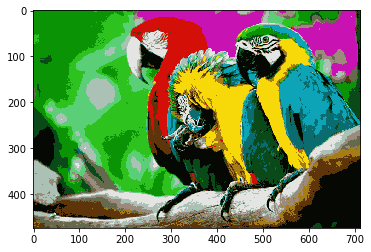

In [37]:
pylab.imshow(image_mean)

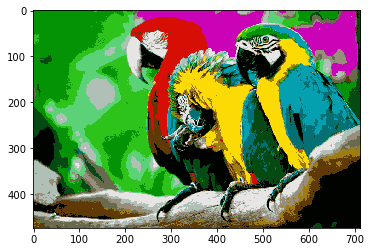

In [38]:
pylab.imshow(image_median)

In [65]:
def psnr(image_mean, image, image_median):
    
    mse = np.mean((image - image_mean) ** 2)

    psnr1 = 10 * math.log10(float(1) / mse)

    mse = np.mean((image - image_median) ** 2)

    psnr2 = 10 * math.log10(float(1) / mse)

    return psnr1, psnr2

Colors =  1  PSNR =  9.818835544771293
Colors =  2  PSNR =  12.080177084931087
Colors =  3  PSNR =  13.153487044607248
Colors =  4  PSNR =  14.3678179408688
Colors =  5  PSNR =  15.527146197305989
Colors =  6  PSNR =  16.543994096630183
Colors =  7  PSNR =  17.64099250863652
Colors =  8  PSNR =  18.436829014063576
Colors =  9  PSNR =  19.112672735788138
Colors =  10  PSNR =  19.64075663591531
Colors =  11  PSNR =  20.127588746514583


NameError: name 'color' is not defined

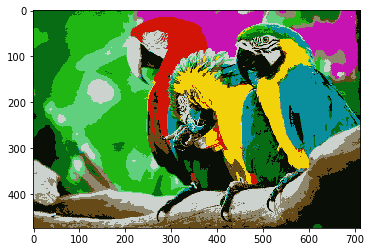

In [67]:
colors = 0

for colors in range(160):
    
    colors = colors + 1

    kmeans = KMeans(random_state=241, init='k-means++', n_clusters = colors).fit(objects)

    df = pd.DataFrame(objects, columns = ['r','g','b'])
    df['clust'] = pd.Series(kmeans.predict(objects))

    mean_color = np.zeros((colors, 3))

    median_color = np.zeros((colors, 3))

    for i in range(colors):

        mean_color[i] = np.mean(df[df['clust'] == i])[['r','g','b']]

        median_color[i][0] = np.median(df[df['clust'] == i]['r'])
        median_color[i][1] = np.median(df[df['clust'] == i]['g'])
        median_color[i][2] = np.median(df[df['clust'] == i]['b'])


    image_mean = np.zeros((len(binimage), len(binimage[0]), 3))

    image_median = np.zeros((len(binimage), len(binimage[0]), 3))

    k = 0

    for i in range(len(binimage)):

        for j in range(len(binimage[i])):

            cl = int(df.loc[k]['clust'])

            image_mean[i][j] = mean_color[cl]

            image_median[i][j] = median_color[cl]

            k = k+1

    psnr1, psnr2 = psnr(image_mean, binimage, image_median)
    
    print("Colors = ",colors, " PSNR = ", max(psnr1, psnr2))
    
    if max(psnr1, psnr2) >= 20:
        
        break
        
pylab.imshow(image_mean)

print("Минимум цветов = ", color, " PSNR = ", max(psnr1, psnr2))